# Programming and Scripting Project 2023

## Deborah Anne Gormley - g00247875

## Project Summary

The goal of the project is to explor the Fisher's Iris data set which can be found [here](https://archive.ics.uci.edu/ml/datasets/iris)

The Fisher's Iris data set contains 150 rows which describes the dimensions of sepals and petals of 3 different Iris plants (50 rows / plant). The data set is popular in research based on pattern recognition where researchers have been able to use logistic regression, and other machine learning algorithms to accurately predict the class attibute based on the 4 attributes: 

1. Sepal length (cm) - length of the sepals of the Iris flowers.
2. Sepal width (cm) - width of the sepals of the Iris flowers.
3. Petal length (cm) - length of the petals of the Iris flowers.
4. Petal width (cm) - width of the petals of the Iris flowers.


The project will use the Pandas library to load, visualise, create a summary and histogram of the data to explore the dataset and see if patterns can be identified before attempting to use another library to plot the data and predict a class using a simple logistic regression algorithm.

The data first needs to be loaded before it can be visualised. It can be loaded using the Pandas library.

The Pandas library is a useful utility for loading and storing data from sources such as `.csv` and `.data` files. There is a built in function `.read_csv()` which takes the file name and a delimiter as arguements and load the contents into a Pandas dataframe object. There is an optional argument which can add column names to the table More usage information about Pandas can be found on their [api reference](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table) 

In [1]:
# Before we can import pandas we first use 'pip install pandas' in the terminal
import pandas as pd

# load the data from the .data file into a variable and assign column names for each
iris_data = pd.read_csv('./assets/iris.data', delimiter=',', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

# Now we can preview it using the .head() function, it should display the first couple of rows of data
print(iris_data.head(5))


   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Now that the data is loaded into a dataframe `.describe()` can be called on it to get a summary of the minimum, maximum, mean, standard deviation, the percentiles for each attribute in the dataset (excluding the class).

In [2]:
# assign the description to a variable
iris_data_summary = iris_data.describe()

print(iris_data_summary)

# after we print it we can also write the information to a filei
iris_data_summary.to_csv('./output/iris_ds_summary.txt', header=True)

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


From the summary above the data shows that the petal length and petal width attributes have a wider range of values and higher standard deviations compared to the sepal length and sepal width attributes. The petal length and petal width values indicate that the majority of the values are located towards the lower end of the range.

Next to show a histogram pandas also has a funtion `.hist()` which can be used to generate histograms for each attibute in the data set. The histogram will show the shape of the distribution of the dataset. Depending on its shape it will show either the data being skewed left or right, or a bell shape curve if the data is normally distributed. It will also show if there are any outliers or clusters in the data.

To be able to show these and write the histogram to a file a library called matplotlib is needed. A handy tool to understand how to use this is their [api reference](https://matplotlib.org/stable/api/index.html) They also provide some nice examples here too!

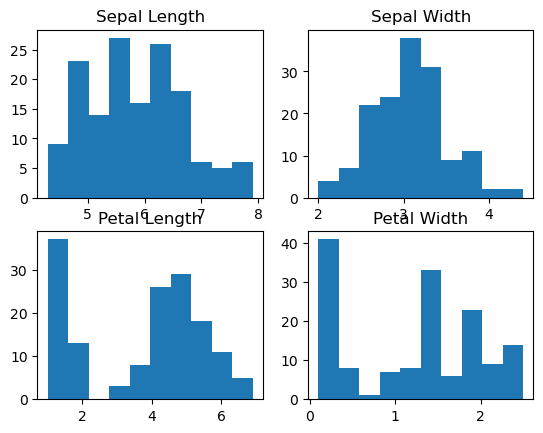

In [12]:
import matplotlib.pyplot as plt

# we can use subplots to add all 4 plots into a single image rather than having to print them individually
fig, axs = plt.subplots(2,2)

axs[0,0].hist(iris_data['sepal length'], bins=10)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(iris_data['sepal width'], bins=10)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(iris_data['petal length'], bins=10)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(iris_data['petal width'], bins=10)
axs[1,1].set_title('Petal Width')
plt.show()
fig.savefig('./output/iris_data_histogram.png')

From the above plot it shows normal distribution for the Sepal Length and Width, whereas the Petal Length and width appear to be positively skewed. This confirms what the findings from the summary. Now lets plot the p